In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import statsmodels.api as sm

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

In [5]:
milk = pd.read_csv('/home/alexander/Загрузки/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [6]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


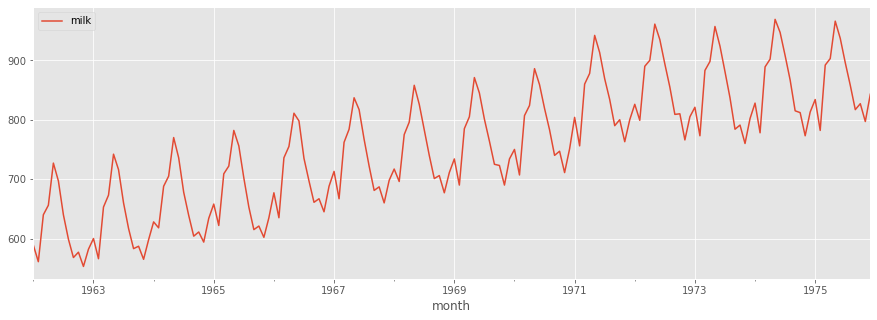

In [282]:
milk.plot()

In [283]:
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [284]:
a = []
g = 1962
k = 1
r = 0
for i in range(168):
    a.append(milk['milk'][i]/calendar.monthrange(g, k)[1])
    if(r % 12 ==0):
        g += 1
        k = 1
    r += 1
print(a)

[24.193548387096776, 18.096774193548388, 20.64516129032258, 21.161290322580644, 23.451612903225808, 22.483870967741936, 20.64516129032258, 19.322580645161292, 18.322580645161292, 18.612903225806452, 17.838709677419356, 18.774193548387096, 19.35483870967742, 18.258064516129032, 21.06451612903226, 21.70967741935484, 23.93548387096774, 23.096774193548388, 21.29032258064516, 19.903225806451612, 18.806451612903224, 18.93548387096774, 18.225806451612904, 19.29032258064516, 20.258064516129032, 19.93548387096774, 22.193548387096776, 22.741935483870968, 24.838709677419356, 23.741935483870968, 21.870967741935484, 20.612903225806452, 19.483870967741936, 19.70967741935484, 19.161290322580644, 20.451612903225808, 21.225806451612904, 20.06451612903226, 22.870967741935484, 23.29032258064516, 25.225806451612904, 24.387096774193548, 22.64516129032258, 21.06451612903226, 19.838709677419356, 20.032258064516128, 19.419354838709676, 20.483870967741936, 21.838709677419356, 20.483870967741936, 23.74193548387

In [285]:
milk['value'] = a

In [286]:
milk

,milk,value
month,,
1962-01-01,589,24.193548
1962-02-01,561,18.096774
1962-03-01,640,20.645161
1962-04-01,656,21.161290
1962-05-01,727,23.451613
...,...,...
1975-08-01,858,27.677419
1975-09-01,817,26.354839
1975-10-01,827,26.677419


In [287]:
del milk['milk']

In [288]:
milk

,value
month,
1962-01-01,24.193548
1962-02-01,18.096774
1962-03-01,20.645161
1962-04-01,21.161290
1962-05-01,23.451613
...,...
1975-08-01,27.677419
1975-09-01,26.354839
1975-10-01,26.677419


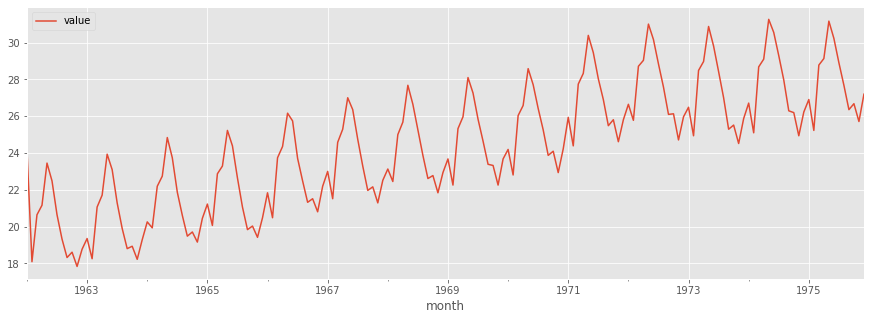

In [289]:
milk.plot()

In [290]:
sm.tsa.stattools.adfuller(milk)

(-1.4105148036114854,
 0.5772249375282071,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 64.3729601670563)

In [302]:
milk

,value
month,
1962-01-01,24.193548
1962-02-01,18.096774
1962-03-01,20.645161
1962-04-01,21.161290
1962-05-01,23.451613
...,...
1975-08-01,27.677419
1975-09-01,26.354839
1975-10-01,26.677419


In [307]:
milk_diff1 = milk - milk.shift(1)

In [308]:
milk_diff12 = milk - milk.shift(12)

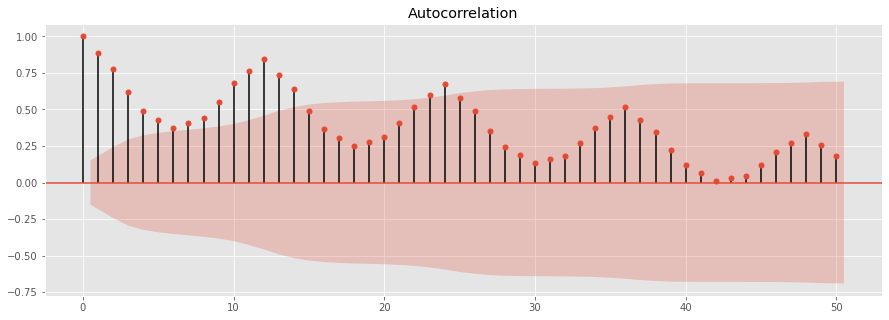

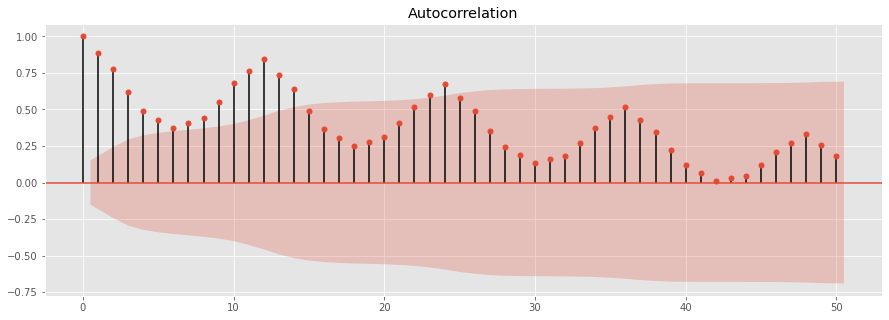

In [309]:
sm.graphics.tsa.plot_acf(milk.squeeze(), lags=50)

/home/alexander/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


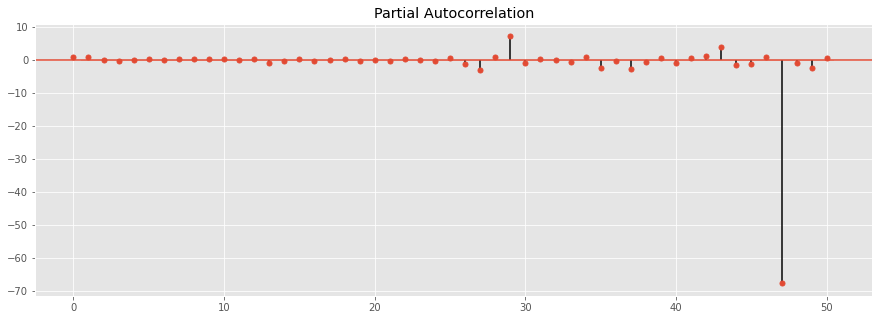

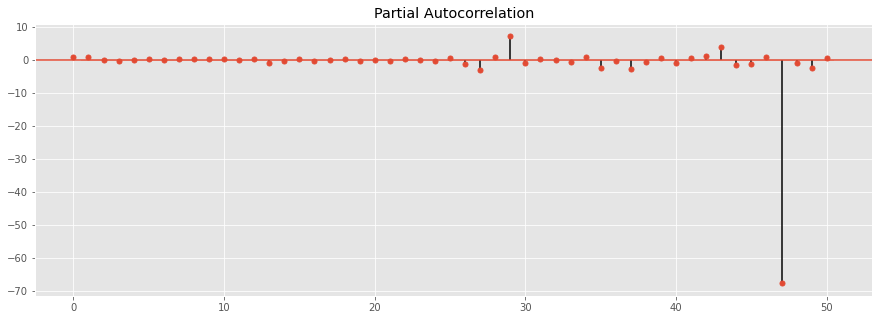

In [292]:
sm.graphics.tsa.plot_pacf(milk.values.squeeze(), lags=50)